In [1]:
def coeff():
    for i in range(1,n):
        for j in range(1,m):
            A[i,j]=2.0*(1/(h*h)+1/(k*k))
            B[i,j]=((1/(h*h))+(1/(2*r[i]*h)))
            C[i,j]=((1/(h*h))-(1/(2*r[i]*h)))
            D[i,j]=1/(k*k)
            E[i,j]=1/(k*k)

In [2]:
def gauss():
    for k1 in range(1,p):
        for i in range(1,n):
            for j in range(1,m):
                U[i,j]=(B[i,j]*U[i+1,j]+C[i,j]*U[i-1,j]+D[i,j]*U[i,j+1]+E[i,j]*U[i,j-1])/A[i,j]

h= 0.4
k= 0.8
r= [0.  0.4 0.8 1.2 1.6 2. ]
z= [0.  0.8 1.6 2.4 3.2 4. ]
12.385
5.593298166666667
2.017119685999999
0.9383634764164999
0.4160584819933666
0.18585647063146293
0.08944887747360863
0.043325034690304465
0.02071473275379976
0.009832993181714933
0.004648247089158897
0.0021919842244209065
0.0010321961082100373
0.0004856426578228046
max1= 0.0004856426578228046
max1,iterartions= 0.0004856426578228046 13


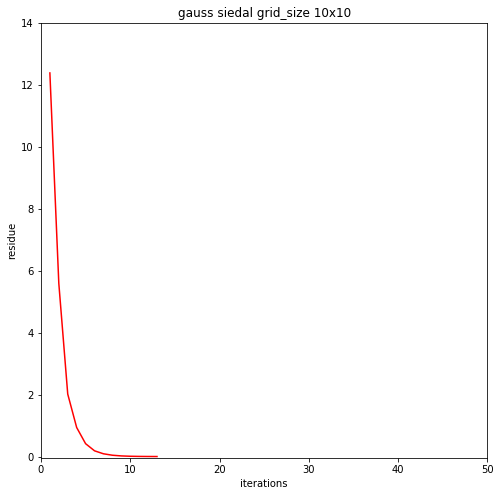

solution converge 
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.62458406  2.05901223  6.08184375 17.38880199 50.        ]
 [ 0.          0.69797287  2.31415806  6.89526868 19.63443997 50.        ]
 [ 0.          0.55848871  1.87440974  5.75182579 17.45659567 50.        ]
 [ 0.          0.29661437  1.01148501  3.25784462 11.43559295 50.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]
r = 0.0
z	u_numeric
0.000000 0.000000
0.800000 0.000000
1.600000 0.000000
2.400000 0.000000
3.200000 0.000000
4.000000 0.000000
r = 0.4
z	u_numeric
0.000000 0.000000
0.800000 0.624584
1.600000 2.059012
2.400000 6.081844
3.200000 17.388802
4.000000 50.000000
r = 0.8
z	u_numeric
0.000000 0.000000
0.800000 0.697973
1.600000 2.314158
2.400000 6.895269
3.200000 19.634440
4.000000 50.000000
r = 1.2000000000000002
z	u_numeric
0.000000 0.000000
0.800000 0.558489
1.600000 1.874410
2.400000 5.751826
3.200000 17.456596
4.000000 50.0000

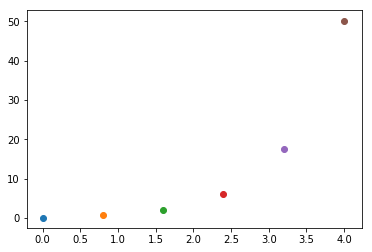

In [4]:
def main():
    import numpy as np
    from numpy import sin , pi, sinh
    global A,B,C,D,E,U,U1,n,m,p,p1,h,k,r
    import seaborn as sns
    from numpy import sin , pi, sinh
    import matplotlib.pyplot as plt
    from mpl_toolkits import mplot3d
    n=5
    m=5
    p=3
    r=2.0
    z=4
    h=r/n
    print("h=",h)#delta r
    k=z/m
    print("k=",k)#delta z
    r0=0
    z0=0
    p1=1000
    eps=0.001
    A=np.zeros((n,m))
    B=np.zeros((n,m))
    C=np.zeros((n,m))
    D=np.zeros((n,m))
    E=np.zeros((n,m))
    U=np.zeros((n+1,m+1))
    r=np.zeros(n+1) 
    z=np.zeros(m+1)
    U1=np.zeros((n+1,m+1))
    R=np.zeros(p1)
    R1=np.zeros(p1)
    r[0]=r0
    for i in range(1,n+1):
        r[i]=r[i-1]+h
    print("r=",r)
    z[0]=z0
    for j in range(1,m+1):
        z[j]=z[j-1]+k
    print("z=",z)    
    
    for i in range(0,n+1):
        U[i,0]=0
        U[i,m]=50
    for j in range(0,m+1):
        U[n,j]=0
        U[0,j]=0
    #print("u=",U)
    #for j in range(0,m+1):
        #U[n,j]=50
    coeff()
    for k2 in range(0,p1):
        for i in range(0,n+1):
            for j in range(0,m+1):
                U1[i,j]=U[i,j]
        gauss()
        max1=0
        flag=0
        for i in range(1,n):
            for j in range(1,m):
                max2=abs(U[i,j]-U1[i,j])
                if(max2>max1):
                    max1=max2
        R[k2]=max1
        print(max1)
        R1[k2]=k2+1
        if(max1<eps):
            print("max1=",max1)
            flag=1
            break
    print("max1,iterartions=",max1,k2)
    plt.figure(figsize=(8,8))
    plt.plot(R1[0:k2],R[0:k2],color="red")
    plt.xlabel("iterations")
    plt.ylabel("residue")
    plt.ylim([-0.04,14])
    plt.xlim([0,50])
    plt.title("gauss siedal grid_size 10x10")
    plt.show()
    if flag==1:
        print("solution converge ")
    else:
        print("max1,iter=",max1,k2)

    
    print(U)
   
    for i in range(0,n+1):
        r1=r[i]
        print ('r =',r1)
        print("z\tu_numeric")
        for j in range(0,m+1):
            #u_exact=((300.0/pi)*((sin(pi)*x[i])*(sinh(pi)*y[j])))/sinh(pi)
            print('{0:1f} {1:2f}'.format(z[j], U[i,j]))
            #if(j==0.8):
    for i in range(0,n+1):
        #print("r=",r[i])
        for j in range(0,m+1):
            if(i==1.0):
                plt.scatter(z[j],U[i,j])
                #plt.title(gauss_seidal)
    plt.show()
main()